In [ ]:
from PIL import Image
from google.colab import drive
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection, ensemble
from sklearn.linear_model import LogisticRegression

drive.mount('/content/drive')

# Image Preprocessing

In [ ]:
# image preprocessing
pix_list=[]
for dir in glob.glob('/content/drive/My Drive/CS610/Code/Dataset/*/*'):
  im = Image.open(dir,'r')
  pix_list.append([dir.split('/')[-2]]+list(im.getdata()))
name_list= ['case']+['pix '+str(i) for i in range(1,128*128+1)]
df=pd.DataFrame(pix_list, columns=[name_list])

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
# Select the first 10k rows and 784 columns
features_train = df.iloc[0:5760,1:16386].values
labels_train = df.iloc[0:5760,0:1].values

features_train = features_train.astype('float32')
features_train /= 255

# Get test data, next 2K images
features_test = df.iloc[5760:,1:].values
labels_test = df.iloc[5760:,:1].values

features_test = features_test.astype('float32')
features_test /= 255

print('Training data shape', features_train.shape, 'Train data shape', features_test.shape)

Training data shape (5760, 16384) Train data shape (640, 16384)


# Naive Bayes

In [ ]:
# build nb models
clf_mt = MultinomialNB()
clf_gs = GaussianNB()
clf_bn = BernoulliNB()

clf_mt.fit(features_train, labels_train.ravel()) 
clf_gs.fit(features_train, labels_train.ravel())
clf_bn.fit(features_train, labels_train.ravel())

y_pred = []
# Get predictions for test set
y_pred_mt = clf_mt.predict(features_test)
y_pred_gs = clf_gs.predict(features_test)
y_pred_bn = clf_bn.predict(features_test)
y_pred.append(y_pred_mt)
y_pred.append(y_pred_gs)
y_pred.append(y_pred_bn)

# get true labels from test set
y_true = labels_test.ravel()

# Print accuracy
model_names = ["Multinomial", "Gaussian", "Bernoulli"]
for m,n in zip(y_pred,model_names):
  acc=metrics.accuracy_score(y_true, m)
  pre=metrics.precision_score(y_true, m, average='weighted')
  rec=metrics.recall_score(y_true, m, average='weighted')
  print(n)
  print('Accuracy: ', round(acc, 4))
  print('Precision: ', round(pre, 4))
  print('Recall: ', round(rec,4))
  print('f2: ', round((5*pre*rec/(4*pre+rec)),4))
  print("-"*20)

Multinomial
Accuracy:  0.4938
Precision:  0.5223
Recall:  0.4938
f2:  0.4992
--------------------
Gaussian
Accuracy:  0.5172
Precision:  0.5601
Recall:  0.5172
f2:  0.5252
--------------------
Bernoulli
Accuracy:  0.5328
Precision:  0.447
Recall:  0.5328
f2:  0.5131
--------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# matrix function
class_names=['Mild', 'Moderate', 'Non', 'Very_Mild']
def cf_matrix_heatmap(y_true, y_pred):
    data = metrics.confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))  
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',
    xticklabels=class_names, yticklabels=class_names)# font size

Multinomial
Gaussian
Bernoulli


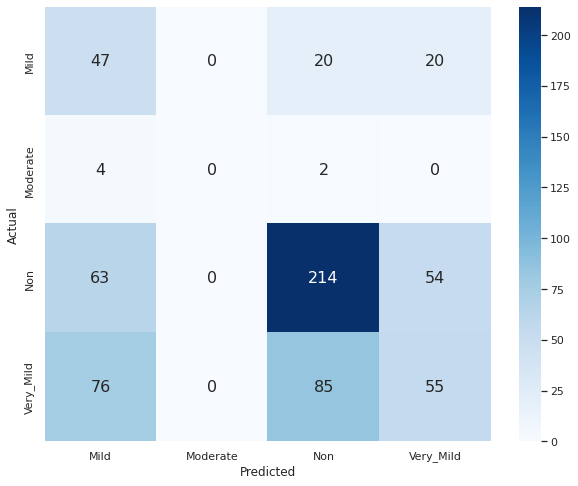

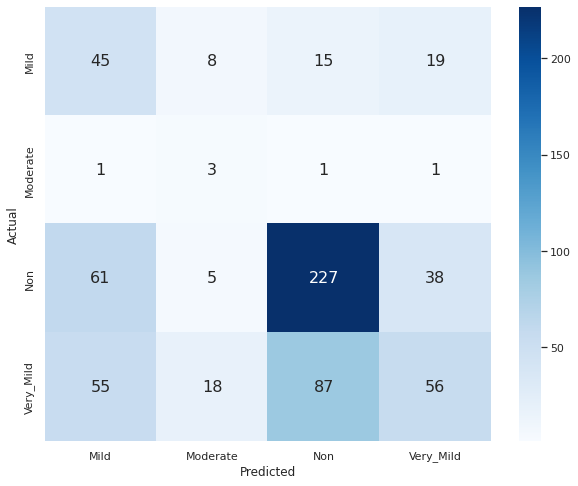

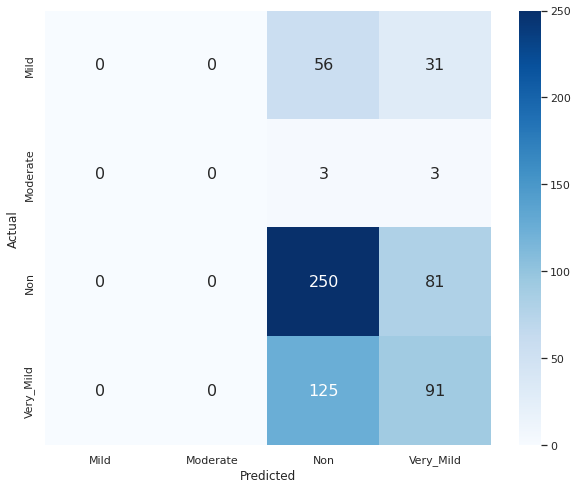

In [ ]:
for m, n in zip(y_pred,model_names):
  print(n)
  cf_matrix_heatmap(y_true.tolist(), m.tolist())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for m, n in zip(y_pred,model_names):
  print(n)
  print(classification_report(y_true, m))
  print('-'*60)

Multinomial
                    precision    recall  f1-score   support

     Mild_Demented       0.25      0.54      0.34        87
 Moderate_Demented       0.00      0.00      0.00         6
      Non_Demented       0.67      0.65      0.66       331
Very_Mild_Demented       0.43      0.25      0.32       216

          accuracy                           0.49       640
         macro avg       0.34      0.36      0.33       640
      weighted avg       0.52      0.49      0.49       640

------------------------------------------------------------
Gaussian
                    precision    recall  f1-score   support

     Mild_Demented       0.28      0.52      0.36        87
 Moderate_Demented       0.09      0.50      0.15         6
      Non_Demented       0.69      0.69      0.69       331
Very_Mild_Demented       0.49      0.26      0.34       216

          accuracy                           0.52       640
         macro avg       0.39      0.49      0.38       640
      weighte

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

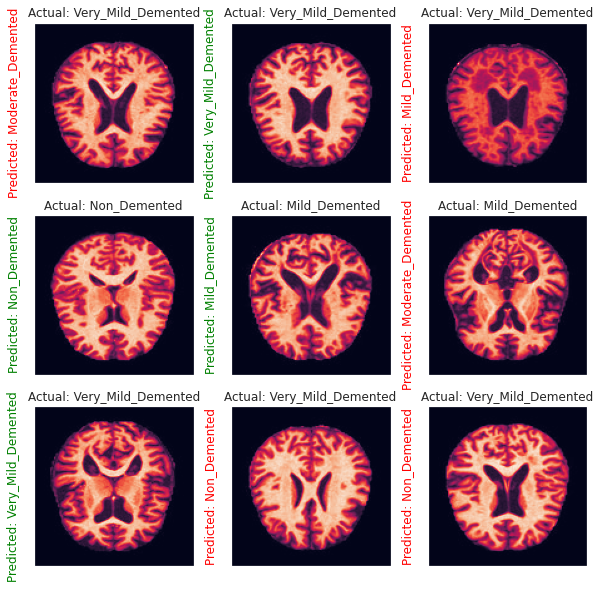

In [ ]:
#plt.axis("off")
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    recover = features_test[i] * 255
    image = np.reshape(recover, (128, 128)) 
    plt.imshow(image.astype("uint8"))
    #plt.title(f'True: {y_true[i]}, pred: {y_pred_mt[i]}')
    if(y_true[i]==y_pred_gs[i]):
            plt.title("Actual: "+ y_true[i])
            plt.ylabel("Predicted: "+y_pred_gs[i],fontdict={'color':'green'})           
    else:
        plt.title("Actual: "+y_true[i])
        plt.ylabel("Predicted: "+y_pred_gs[i],fontdict={'color':'red'})
    #plt.axis("off")
    plt.gca().axes.yaxis.set_ticklabels([])        
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(False)

# Logistic Regression


In [ ]:
# Build logistic regression model
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial')
clf.fit(features_train,labels_train.ravel())
# Get predictions for test set
y_pred = clf.predict(features_test)

# get true labels from test set
y_true = labels_test.ravel()

In [ ]:
  acc=metrics.accuracy_score(y_true, y_pred)
  pre=metrics.precision_score(y_true, y_pred, average='weighted')
  rec=metrics.recall_score(y_true, y_pred, average='weighted')
  print('Accuracy: ', round(acc, 4))
  print('Precision: ', round(pre, 4))
  print('Recall: ', round(rec,4))
  print('f2: ', round((5*pre*rec/(4*pre+rec)),4))

Accuracy:  0.8234
Precision:  0.8206
Recall:  0.8234
f2:  0.8229


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_true, y_pred))

                    precision    recall  f1-score   support

     Mild_Demented       0.88      0.68      0.77        87
 Moderate_Demented       0.00      0.00      0.00         6
      Non_Demented       0.87      0.87      0.87       331
Very_Mild_Demented       0.75      0.84      0.79       216

          accuracy                           0.82       640
         macro avg       0.62      0.60      0.61       640
      weighted avg       0.82      0.82      0.82       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


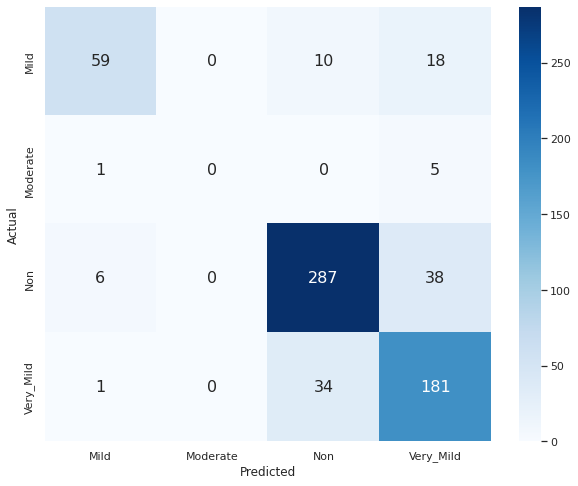

In [ ]:
cf_matrix_heatmap(y_true.tolist(), y_pred.tolist())

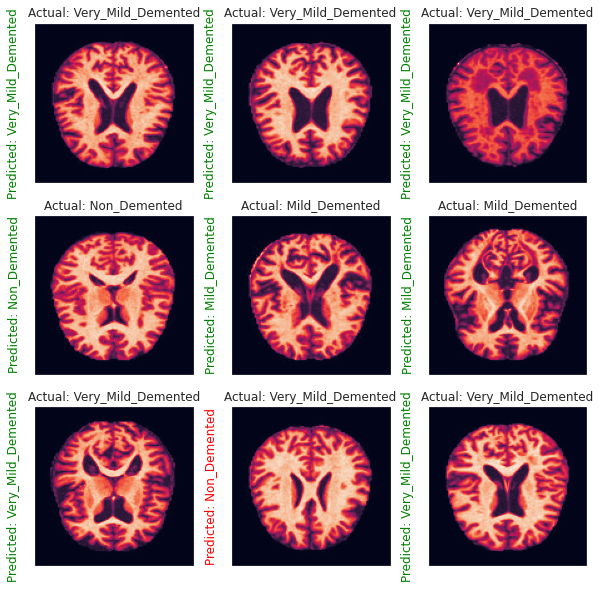

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    recover = features_test[i] * 255
    image = np.reshape(recover, (128, 128)) 
    plt.imshow(image.astype("uint8"))
    #plt.title(f'True: {y_true[i]}, pred: {y_pred_mt[i]}')
    if(y_true[i]==y_pred[i]):
            plt.title("Actual: "+ y_true[i])
            plt.ylabel("Predicted: "+y_pred[i],fontdict={'color':'green'})           
    else:
        plt.title("Actual: "+y_true[i])
        plt.ylabel("Predicted: "+y_pred[i],fontdict={'color':'red'})
    #plt.axis("off")
    plt.gca().axes.yaxis.set_ticklabels([])        
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, ensemble

model = ensemble.RandomForestClassifier(min_samples_split=3,max_depth=9,max_features='sqrt')
model.fit(features_train,labels_train.ravel())
 
# Get predictions for test set
y_pred = model.predict(features_test)

# get true labels from test set
y_true = labels_test.ravel()

In [ ]:
  acc=metrics.accuracy_score(y_true, y_pred)
  pre=metrics.precision_score(y_true, y_pred, average='weighted')
  rec=metrics.recall_score(y_true, y_pred, average='weighted')
  print('Accuracy: ', round(acc, 4))
  print('Precision: ', round(pre, 4))
  print('Recall: ', round(rec,4))
  print('f2: ', round((5*pre*rec/(4*pre+rec)),4))

Accuracy:  0.8562
Precision:  0.8587
Recall:  0.8562
f2:  0.8567


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_true, y_pred))

                    precision    recall  f1-score   support

     Mild_Demented       1.00      0.46      0.63        87
 Moderate_Demented       0.00      0.00      0.00         6
      Non_Demented       0.86      0.98      0.92       331
Very_Mild_Demented       0.82      0.85      0.83       216

          accuracy                           0.86       640
         macro avg       0.67      0.57      0.60       640
      weighted avg       0.86      0.86      0.84       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


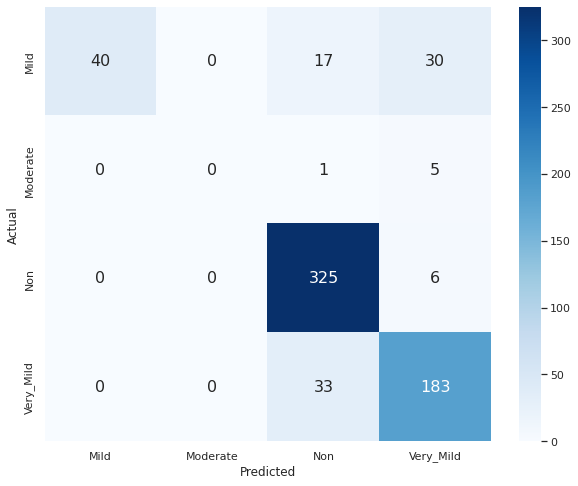

In [ ]:
cf_matrix_heatmap(y_true.tolist(), y_pred.tolist())

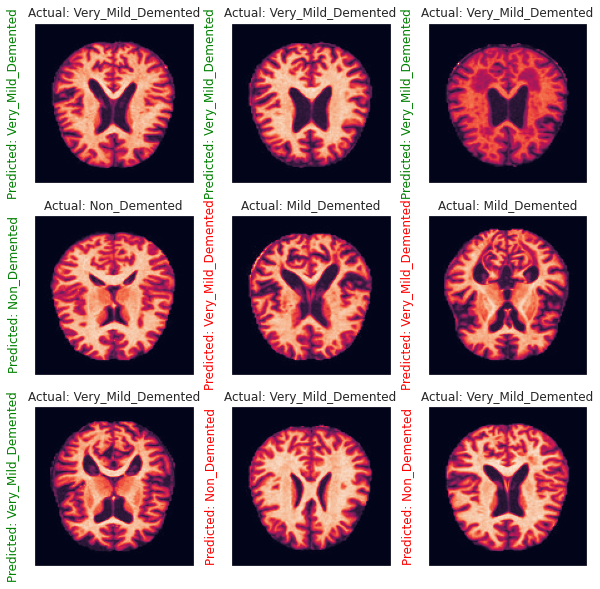

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    recover = features_test[i] * 255
    image = np.reshape(recover, (128, 128)) 
    plt.imshow(image.astype("uint8"))
    #plt.title(f'True: {y_true[i]}, pred: {y_pred_mt[i]}')
    if(y_true[i]==y_pred[i]):
            plt.title("Actual: "+ y_true[i])
            plt.ylabel("Predicted: "+y_pred[i],fontdict={'color':'green'})           
    else:
        plt.title("Actual: "+y_true[i])
        plt.ylabel("Predicted: "+y_pred[i],fontdict={'color':'red'})
    #plt.axis("off")
    plt.gca().axes.yaxis.set_ticklabels([])        
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(False)